In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [26]:
num_simulations = 10000
num_people = 1000
num_days = 100

all_simulation_data = []

In [27]:
def simulate_wbc_count():
    person_data = []
    
    for _ in range(num_people):
        is_regular_sleeper = np.random.choice([True, False])

        sleep_hours = np.random.uniform(7, 9, num_days) if  is_regular_sleeper else np.random.uniform(3, 9, num_days)
        avg_sleep_hours = np.mean(sleep_hours)
        std_sleep_duration = np.std(sleep_hours)

        baseline_wbc_count = np.random.normal(7750, 1000)
        wbc_increase_per_min_std = np.random.normal(2700, 600)
        wbc_count_change = std_sleep_duration * wbc_increase_per_min_std
        wbc_count = baseline_wbc_count + wbc_count_change

        person_data.append({
            'is_regular_sleeper': is_regular_sleeper,
            'avg_sleep_hours': avg_sleep_hours,
            'wbc_count': int(wbc_count),
            'abnormal_wbc_count': 'Yes' if wbc_count < 4500 or wbc_count > 11000 else 'No'
        })
    
    return person_data


In [28]:

# Perform the simulation multiple times
for _ in range(num_simulations):
    sim_data = simulate_wbc_count()
    all_simulation_data.append(sim_data)

# Flatten the list of lists
all_simulation_data = [item for sublist in all_simulation_data for item in sublist]


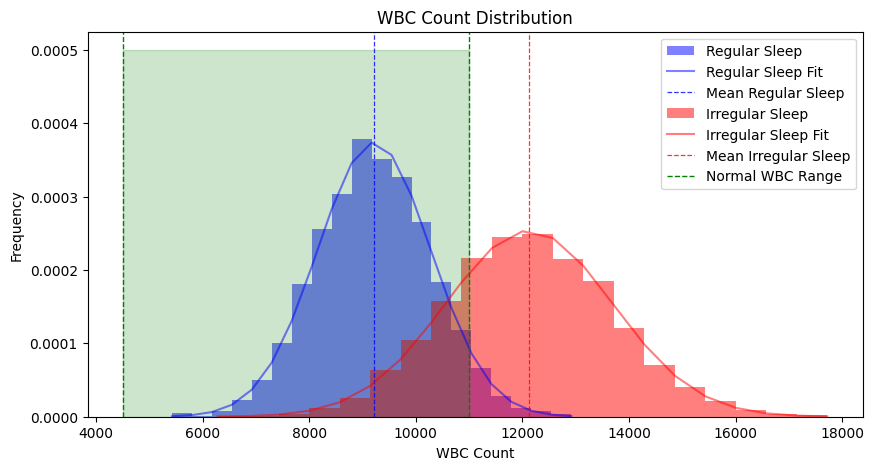

In [29]:
regular_wbc_counts = [person['wbc_count'] for person in all_simulation_data if person['is_regular_sleeper']]
irregular_wbc_counts = [person['wbc_count'] for person in all_simulation_data if not person['is_regular_sleeper']]

sorted_regular_wbc_counts = sorted(regular_wbc_counts)
sorted_irregular_wbc_counts = sorted(irregular_wbc_counts)

# Prepare plot
plt.figure(figsize=(10, 5))

# Histogram for regular and irregular sleep
for data, color, label in [(regular_wbc_counts, 'blue', 'Regular Sleep'), 
                           (irregular_wbc_counts, 'red', 'Irregular Sleep')]:
    count, bins, ignored = plt.hist(data, density=True, bins=20, alpha=0.5, color=color, label=f'{label}')
    mean, std = np.mean(data), np.std(data)
    plt.plot(bins, stats.norm.pdf(bins, mean, std), color=color, alpha=0.5, label=f'{label} Fit')
    plt.axvline(mean, color=color, alpha=0.8, linestyle='dashed', linewidth=.9, label=f'Mean {label}')

# Highlight normal WBC range
plt.fill_betweenx([0, .0005], 4500, 11000, color='green', alpha=0.2)
plt.axvline(4500, color='green', alpha=1, linestyle='dashed', linewidth=1, label='Normal WBC Range')
plt.axvline(11000, color='green', alpha=1, linestyle='dashed', linewidth=1)

# Labels, legend, and title
plt.xlabel('WBC Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('WBC Count Distribution')
plt.show()
